# Lasso total 60 / select 30

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'

In [6]:
lasso_all = pd.read_csv(r'..\..\..\Code\SH\2. feature selection\lasso_feature_all.csv', index_col=0)
lasso_30 = pd.read_csv(r'..\..\..\Code\SH\2. feature selection\lasso_feature_30.csv', index_col=0)

In [12]:
#rank에 30빼서 1부터 30까지로 만들어줌
lasso_30 = lasso_30.sort_values('rank')
lasso_30['rank'] = lasso_30['rank'] -30

In [125]:
#rank 거꾸로 매겨짐 그지같은 지수때문에 반대로 인식해서 min으로 다시 생성함
lasso_30['rank'] = lasso_30['abs_coef'].rank(method='min', ascending=False, na_option='top').astype(int)

In [130]:
#인덱스 재조정
lasso_30 = lasso_30.reset_index(drop=True)
lasso_30 = lasso_30.drop(columns=['index'])

In [136]:
lasso_30

,name,lasso coef,used,abs_coef,rank,category
0,설비투자효율,-5.018820e-11,True,5.018820e-11,30,생산성
1,당좌비율,6.669630e-11,True,6.669630e-11,29,안정성
2,재고자산회전률,-8.761525e-11,True,8.761525e-11,28,활동성
3,자기자본배율,-2.949233e-09,True,2.949233e-09,27,안정성
4,유형자산증가율,4.595543e-09,True,4.595543e-09,26,성장성
5,매출채권_대_매입채무비율,1.351565e-08,True,1.351565e-08,25,안정성
6,이자보상비율,1.359941e-08,True,1.359941e-08,24,수익성
7,매입채무회전률,-3.274083e-08,True,3.274083e-08,23,활동성
8,영업이익증가율,-3.999414e-08,True,3.999414e-08,22,성장성
9,EBITDA단기차입비율,-7.348974e-08,True,7.348974e-08,21,현금흐름


In [ ]:
lasso_30['category'].plot(kind='pie')

<AxesSubplot:>

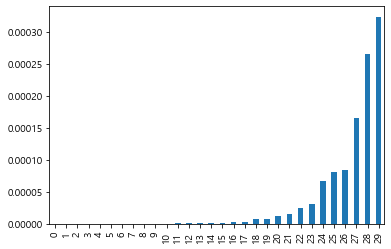

In [137]:
lasso_30['abs_coef'].plot(kind='bar')

# Final df ANOVA + LASSO 생성

In [45]:
df = pd.read_csv(r'..\..\..\Data\최종데이터셋\finaldataset_ver7.6.csv')

In [48]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '유동비율', '당좌비율', '유동부채비율', '비유동비율', '순운전자본비율',
       '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '자기자본순이익률', '총자본순이익률',
       '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률', '매출액순이익률', '금융비용부담률',
       '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률', '경영자본회전률', '비유동자산회전률',
       '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율', '총자본투자효율', '자기자본증가율',
       '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율', '유동자산증가율', 'EBITDA_매출액',
       '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율', '매출액판관비율',
       '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간', 'EBITDA이자보상비율',
       'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율',
       '영업이익대비영업현금흐름비율', '영업이익대비EBITDA비율', '자기자본배당률', '금융비용_대_부채비율', '자기자본배율',
       '누적수익성비율', '총자산영업이익률', '총자산회전율', '정기공시제목', '수시공시제목', '대표이사_변경',
       '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자', '출자목적_경영권',
       '출자목적_영업이익', '기타', '외국인_주식분포비율', '종가', '종가변동률', '년', 'key', '부도',
       '신종채권_운영', '신종

In [94]:
col_head = ['회사명', '거래소코드', '회계년도']
col_tail = ['년', 'key', '부도']
# ANOVA + LASSO
col_financial = ['설비투자효율', '총자본투자효율', '부채구성비율','순운전자본비율','재고자산보유기간','매출채권회수기간','매입채무회전률','경영자본회전률', '경영자본순이익률','총자본순이익률','자기자본증가율']
col_text_step1 = [ '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단',  '종가변동률']
col_text_step2 = [ '출자목적_투자', '출자목적_경영권','출자목적_영업이익','신종채권_운영', '신종채권_시설', '신종채권_기타','종가변동률']

In [89]:
pd.concat([df[col_head], df[col_financial], df[col_text_step1],df[col_tail]], axis=1)

,회사명,거래소코드,회계년도,설비투자효율,총자본투자효율,부채구성비율,순운전자본비율,재고자산보유기간,순운전자본비율,재고자산보유기간,...,대표이사_변경,최대주주_변경,회계처리위반,횡령배임,신종채권,영업조업중단,종가변동률,년,key,부도
0,(주)CMG제약,58820.0,2000/12,0.00,0.00,55.519145,0.00,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,2000.0,588202001.0,0.0
1,(주)CMG제약,58820.0,2001/12,48.33,8.76,57.963459,22.76,323.008850,22.76,323.008850,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.633803,2001.0,588202002.0,0.0
2,(주)CMG제약,58820.0,2002/12,3.90,0.79,57.574183,7.98,155.319149,7.98,155.319149,...,1.0,0.0,0.0,0.0,1.0,1.0,-0.633803,2002.0,588202003.0,0.0
3,(주)CMG제약,58820.0,2003/12,289.02,16.80,41.851216,35.58,166.666667,35.58,166.666667,...,1.0,0.0,0.0,0.0,1.0,0.0,0.538462,2003.0,588202004.0,0.0
4,(주)CMG제약,58820.0,2004/12,-412.59,-37.94,50.569608,24.97,152.083333,24.97,152.083333,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.312500,2004.0,588202005.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060.0,2016/12,18.38,8.84,12.585769,14.15,5.292923,14.15,5.292923,...,0.0,0.0,0.0,0.0,1.0,0.0,0.126645,2016.0,240602017.0,0.0
26828,흥구석유(주),24060.0,2017/12,18.58,8.80,12.711483,8.68,6.190638,8.68,6.190638,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.189781,2017.0,240602018.0,0.0
26829,흥구석유(주),24060.0,2018/12,19.56,9.80,6.333271,11.59,4.658583,11.59,4.658583,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.025225,2018.0,240602019.0,0.0
26830,흥구석유(주),24060.0,2019/12,42.99,18.02,7.960699,21.47,5.335477,21.47,5.335477,...,0.0,0.0,0.0,0.0,1.0,0.0,0.981516,2019.0,240602020.0,0.0


In [95]:
#df = pd.concat([df[col_head], df[col_finance], df[col_text], df[col_tail]], axis=1)
df_step1 = pd.concat([df[col_head], df[col_financial], df[col_text_step1],df[col_tail]], axis=1)
df_step2 = pd.concat([df[col_head], df[col_financial], df[col_text_step2],df[col_tail]], axis=1)

In [91]:
df_step2.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '순운전자본비율',
       '재고자산보유기간', '순운전자본비율', '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률',
       '경영자본순이익률', '총자본순이익률', '자기자본증가율', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익',
       '신종채권_운영', '신종채권_시설', '신종채권_기타', '종가변동률', '년', 'key', '부도'],
      dtype='object')

In [96]:
df_step1.to_csv('df_step1.csv')
df_step2.to_csv('df_step2.csv')

In [75]:
df_full = pd.read_csv(r'..\..\..\Data\Dataset.csv', index_col=0)

In [80]:
for i in range(len(df_full.columns)):
    print(df_full.columns[i])

회사명
거래소코드
회계년도
소속코드
상장폐지일
감사의견코드
자산총계_요약_
유동자산_요약_
당좌자산_요약_
현금_및_현금성자산_요약_
단기투자자산_요약_
단기예금_요약_
단기매매증권_요약_
단기대여금_요약_
기타단기투자자산_요약_
매출채권_요약_
_할인어음_또는_배서어음_요약_
기타당좌자산_요약_
재고자산_요약_
상품_요약_
제품_요약_
반제품_요약_
재공품_요약_
원재료_요약_
기타재고자산_요약_
임대주택자산_요약_
비유동자산_요약_
투자자산_요약_
_장기금융상품_요약_
_투자유가증권_장기투자증권__요약_
유형자산_요약_
토지
건설중인자산
건물
기계장치
차량운반구
렌탈자산
설비자산
무형자산_요약_
기타비유동자산_요약_
이연자산_요약_
부채총계_요약_
유동부채_요약_
매입채무_요약_
단기차입금_요약_
유동성장기부채_요약_
기타유동부채_요약_
비유동부채_요약_
사채_요약_
장기차입금_요약_
제충당금_요약_
기타비유동부채_요약_
이연부채_요약_
자본총계_요약_
자본금_요약_
자본잉여금_요약_
자본조정_요약_
기타포괄손익누계액_요약_
이익잉여금_요약_
_미처분이익잉여금_및_차기이월미처분이익잉여금_요약_
_당기순이익_요약_
부채와자본총계_요약_
매출액_요약_
매출원가_요약_
매출총이익_요약_
판매비와_관리비_요약_
급료
퇴직급여_요약_
복리후생비_요약_
세금과공과_요약_
임차료_요약_
감가상각비
연구비
기타_판매비와_관리비_요약_
영업이익_요약_
영업외수익_요약_
이자수익_요약_
배당금수익_요약_
외환차익_요약_
외화환산이익_요약_
지분법이익_요약_
기타영업외수익_요약_
영업외비용_요약_
이자비용_요약_
외환차손_요약_
외화환산손실_요약_
지분법손실_요약_
기타영업외비용_요약_
법인세비용차감전_계속사업_손익_요약_
_계속사업손익_법인세비용_요약_
계속사업이익_요약_
중단사업이익_요약_
_법인세효과_요약_
당기순이익_요약_
주당계속사업이익_요약_
주당순이익_요약_
희석화주당계속사업이익_요약_
희석화주당순이익_요약_
CPA수정후_당기순이익_요약_
_주당경상이익_2007년